## Visualizing Filters of a CNN using TensorFlow

In this project, I had the incredible opportunity to delve into the world of deep learning by utilizing the renowned VGG16 model.
By leveraging TensorFlow, I embarked on a journey to visualize diverse filters across different layers of the CNN. The goal? To shed light on the intricate patterns and features that these filters capture during the learning process.

#### Setting Work Envirement 

In [2]:
import tensorflow as tf 
import random 
import matplotlib.pyplot as plt 
print(f"Tensorflow Version : {tf.__version__}")

Tensorflow Version : 2.13.0


#### Importing the model

In [3]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False ,         #finaly fully connected layer not included  
    weights='imagenet',
    input_shape=(96,96,3)
)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

#### Getting Layer Output


In [4]:
def get_submodel(layer_name):
    return tf.keras.models.Model(
        model.input,
        model.get_layer(layer_name).output 
    )
get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### creating images

In [5]:
def create_image():
    return tf.random.uniform((96,96,3))

def plot_image(image,title='random image'):
    image = image - tf.math.reduce_min(image)
    image = image / tf.math.reduce_max(image)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.show()

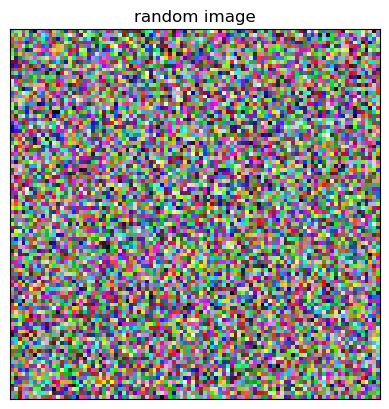

In [6]:
image = create_image()
plot_image(image)

#### Training loop

In [7]:
def visualisze_filter(layer_name,filter_index=None,iters=50):
    submodel = get_submodel(layer_name)
    num_filters=submodel.output.shape[-1]
    
    if filter_index is None :
        filter_index = random.randint(0,num_filters - 1)
    assert num_filters > filter_index , "filer_index is ou of bounds"
    
    image = create_image()
    verbose_step=int(iters / 10 )
    
    for i in range(0,iters):
        with tf.GradientTape() as tape :
            tape.watch(image)
            out = submodel(tf.expand_dims(image,axis=0))[:,:,:,filter_index]
            loss = tf.math.reduce_mean(out)
        grads = tape.gradient(loss,image)
        grads = tf.math.l2_normalize(grads)
        image += grads * 10 
        if (i + 1 ) %verbose_step == 0 :
            print(f'Iteration:{i+1}, Loss : {loss.numpy():.4f}')
    plot_image(image,f'{layer_name} , {filter_index}')

#### Final Results


In [8]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


In [9]:
layer_names=[layer.name for layer in model.layers if 'conv' in layer.name]

Iteration:5, Loss : 43.9656
Iteration:10, Loss : 70.9179
Iteration:15, Loss : 96.6885
Iteration:20, Loss : 122.4388
Iteration:25, Loss : 148.3053
Iteration:30, Loss : 174.2850
Iteration:35, Loss : 200.3610
Iteration:40, Loss : 226.5563
Iteration:45, Loss : 252.8679
Iteration:50, Loss : 279.2101


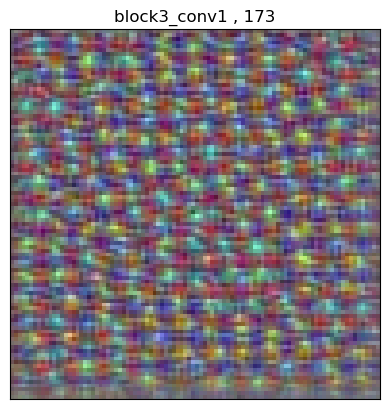

In [13]:
visualisze_filter(layer_names[4])